## Support Vector Machines ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
%matplotlib inline

### Linear SVM Classifier ###

We generate some data in 2 dimensions and make them a little separated.

Code for the plot with the hyperplane and support margins was largely copied from [here](http://scikit-learn.org/0.11/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py).

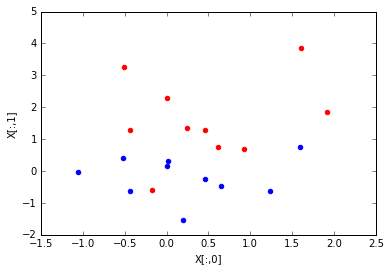

In [2]:
X = np.random.randn(20, 2)
y = np.concatenate((np.ones(10)*-1, np.ones(10)))
X[y == 1] = X[y == 1] + 1
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', color='red')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', color='blue')
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")

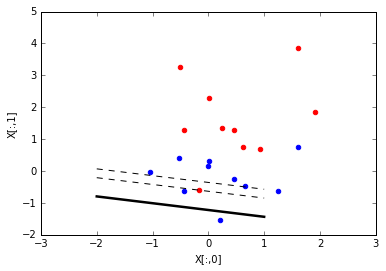

In [3]:
# Fit the Support Vector Regressor with a linear kernel
reg = SVR(C=10.0, kernel="linear")
reg.fit(X, y)

# plot the hyperplane on the scatterplot
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', color='red')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', color='blue')
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")
# hyperplane
xs = range(int(np.min(X[:,0]))-1, int(np.max(X[:,0]))+1)
m = -reg.coef_[0][0] / reg.coef_[0][1]
c = reg.intercept_ / reg.coef_[0][1]
ys = [m * x + c for x in xs]
plt.plot(xs, ys, color='black', linewidth=2.5)
# support margins
sup = reg.support_vectors_[0]
ys_down = [m * x + (sup[1] - m * sup[0]) for x in xs]
sup = reg.support_vectors_[-1]
ys_up = [m * x + (sup[1] - m * sup[0]) for x in xs]
plt.plot(xs, ys_down, 'k--')
plt.plot(xs, ys_up, 'k--')

In [4]:
ypred = reg.predict(X)
mean_squared_error(y, ypred)

0.62181451125774001

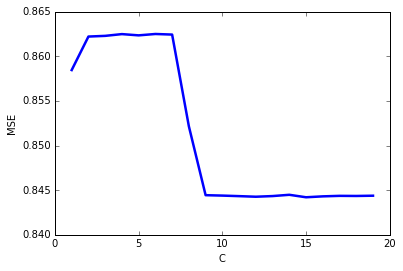

In [5]:
# We use cross-validation to find a good value for C
cs = range(1, 20)
mses = []
for c in cs:
    kfold = KFold(X.shape[0], n_folds=10)
    kmses = []
    for train, test in kfold:
        Xtrain, Xtest, ytrain, ytest = X[train], X[test], y[train], y[test]
        reg = SVR(C=c, kernel="linear")
        reg.fit(Xtrain, ytrain)
        ypred = reg.predict(Xtest)
        kmses.append(mean_squared_error(ytest, ypred))
    mses.append(np.mean(kmses))
plt.plot(cs, mses, linewidth=2.5)
plt.xlabel("C")
plt.ylabel("MSE")

### Nonlinear SVM ###

In [6]:
# Data comes from http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda
# load(url("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda"))
# dat = data.frame(y=factor(y), x)
# write.csv(dat, "ESLMixture.csv", row.names=FALSE)
eslmix_df = pd.read_csv("../data/ESLMixture.csv")
eslmix_df.head()

,y,X1,X2
0,0,2.526093,0.321050
1,0,0.366954,0.031462
2,0,0.768219,0.717486
3,0,0.693436,0.777194
4,0,-0.019837,0.867254


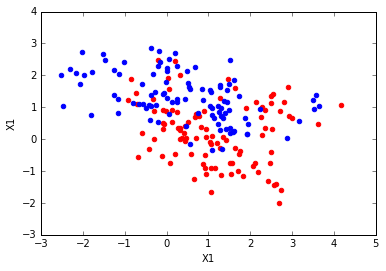

In [7]:
# Plot the data to visualize the relationship
x1 = eslmix_df[eslmix_df["y"] == 0]["X1"]
x2 = eslmix_df[eslmix_df["y"] == 0]["X2"]
plt.scatter(x1, x2, marker='o', color='red')
x1 = eslmix_df[eslmix_df["y"] == 1]["X1"]
x2 = eslmix_df[eslmix_df["y"] == 1]["X2"]
plt.scatter(x1, x2, marker='o', color='blue')
plt.xlabel("X1")
plt.ylabel("X1")

//anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


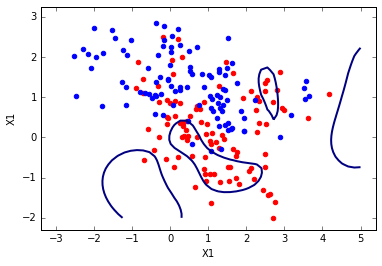

In [8]:
# Fit a non-linear SVM using a radial kernel
X = eslmix_df[["X1", "X2"]].values
y = eslmix_df["y"]
reg = SVR(C=5.0, kernel="rbf")
reg.fit(X, y)

# plot the hyperplane on the scatterplot
xx, yy = np.meshgrid(np.linspace(-3, 5, 50), np.linspace(-2, 3, 50))
Z = reg.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")

x1 = eslmix_df[eslmix_df["y"] == 0]["X1"]
x2 = eslmix_df[eslmix_df["y"] == 0]["X2"]
plt.scatter(x1, x2, marker='o', color='red')
x1 = eslmix_df[eslmix_df["y"] == 1]["X1"]
x2 = eslmix_df[eslmix_df["y"] == 1]["X2"]
plt.scatter(x1, x2, marker='o', color='blue')
plt.xlabel("X1")
plt.ylabel("X1")

The boundaries of the hyperplane generated by the Support Vector machine are non-linear and approximate the boundaries of the data it models (better than a linear hyperplane).

Code for the plot above was copied from [here](http://scikit-learn.org/0.11/auto_examples/svm/plot_svm_nonlinear.html#example-svm-plot-svm-nonlinear-py).